# Cross section over subglacial Lake Vostok

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, fetch, regions, profile, utils

In [2]:
region = regions.lake_vostok
mag_grid = fetch.magnetics(
    version="admap2",
    region=region,
)

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 1100000 to 1099500
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 1535000 to 1536000
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -470000 to -471000
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -230000 to -229500
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 1100000 to 1099500
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 1535000 to 1536000
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), wh

In [3]:
grav_grid = fetch.gravity(
    version="antgg-update",
    anomaly_type="DG",
    region=region,
)

grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 1535000 to 1540000
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 1535000 to 1540000


In [4]:
surface_grid = fetch.bedmachine(
    layer="surface",
    spacing=1e3,
    reference="ellipsoid",
)

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [5]:
# lines = profile.draw_lines(points=utils.region_to_df(region))

In [6]:
## extract the vertices of the line
# df = utils.shapes_to_df(lines)

In [7]:
import pandas as pd

df = pd.DataFrame(
    data={
        "x": [
            1.003520e06,
            1.087488e06,
            1.202176e06,
            1.288192e06,
            1.378304e06,
            1.443840e06,
            1.531904e06,
            1.576960e06,
        ],
        "y": [
            -317440.019270,
            -344063.996081,
            -364544.004241,
            -374784.019401,
            -364544.003553,
            -323583.995989,
            -286720.013565,
            -260095.991530,
        ],
    }
)
# df = pd.DataFrame(
#     data={
#         "x": [1185791.99627817, 1234944.01214548, 1265663.96470165,
#        1320960.03072355, 1347584.02541447],
#         "y": [-538624.00400094, -462848.01458092, -395263.98602406,
#        -292864.01108533, -262144.00306706],
#     }
# )

In [8]:
data_dict = profile.make_data_dict(
    ["Gravity", "Magnetics"],
    [grav_grid, mag_grid],
    ["blue", "red"],
    axes=[0, 1],
)

grdtrack [WARNING]: Some input points were outside the grid domain(s).
grdtrack [WARNING]: Some input points were outside the grid domain(s).
gmtset [WARNING]: Representation of font type not recognized. Using default.


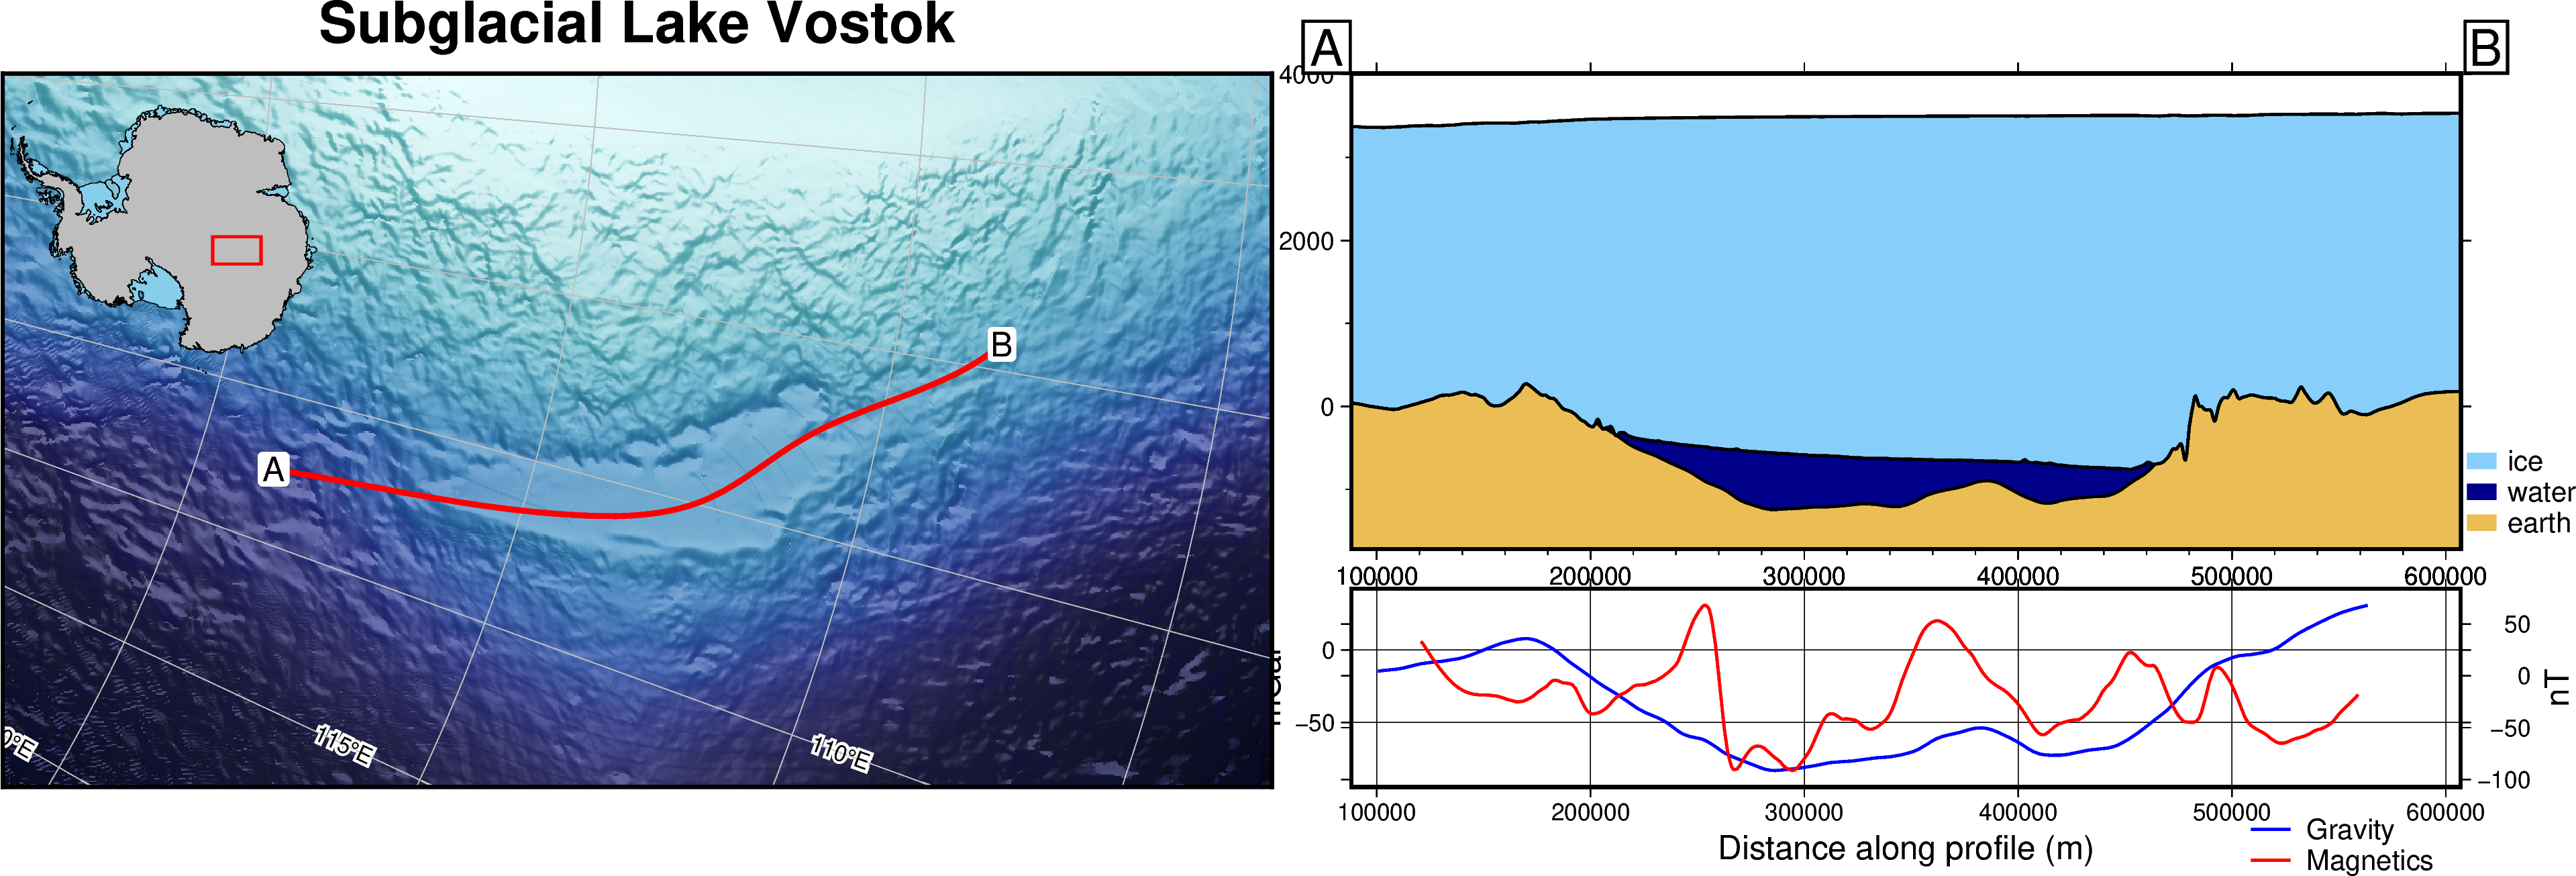

In [9]:
fig, _, _ = profile.plot_profile(
    method="polyline",
    polyline=df,
    num=2000,
    layers_version="bedmachine",
    add_map=True,
    map_background=surface_grid,
    map_cmap="ice",
    map_grd2cpt=True,
    map_shading="+a-45/45+nt.5+m0",
    # subplot_orientation="vertical",
    # fig_height = 12,
    # data_height = 4,
    # map_buffer = .2,
    data_dict=data_dict,
    data_y0_label="mGal",
    data_y1_label="nT",
    data_x_label="Distance along profile (m)",
    # layer_buffer=0.2,
    data_legend_loc="JBR+jTR+o.2c/.2c",  # change the default legend location
)
fig.basemap(frame="wesn+tSubglacial Lake Vostok")

# fig.savefig("poster_v2/lake_vostok.png")
fig.show()